# Title Predicting Customer Churn in Beta Bank: A Data Science Approach to Retention






Introduction:

Customer churn, the loss of customers over time, is a significant concern for businesses. In the case of Beta Bank, customers have been leaving gradually, impacting the bank's bottom line. Recognizing the cost-effectiveness of retaining existing customers compared to acquiring new ones, Beta Bank aims to predict customer churn to proactively address the issue.

This data science project focuses on building a predictive model to identify customers who are likely to leave the bank soon. By analyzing historical customer behavior and contract termination data, the goal is to develop a model with a high F1 score, indicating a balance between precision and recall in predicting customer churn.

The dataset used for this project, sourced from Kaggle, contains various features such as customer demographics, credit score, account balance, product usage, and more. Leveraging this data, the project aims to identify key factors that contribute to customer churn and develop an accurate prediction model.

To achieve the project's objectives, the approach involves several stages. Initially, the data will be downloaded and prepared, followed by an examination of class balance to understand the distribution of churned and retained customers. The project will then proceed with model development, starting with training the model without considering class imbalance and evaluating the F1 score.

Recognizing the impact of class imbalance on model performance, the project will further enhance the model's quality by considering techniques to address the imbalance issue. Various classification algorithms, including logistic regression, decision trees, random forests, and gradient boosting, will be explored. Hyperparameter tuning and model selection will be performed to identify the best combination of algorithms and parameters to maximize the F1 score.

Finally, the project will conclude with the final testing phase, where the developed model will be evaluated on the test set. The F1 score and additional metrics, such as AUC-ROC, will be analyzed to assess the model's performance and compare the effectiveness of different evaluation metrics.

By successfully developing a predictive model with a high F1 score, Beta Bank will be equipped to identify customers at risk of churning and take proactive measures to retain them. This project aims to provide valuable insights into customer behavior and help Beta Bank optimize its retention strategies, ultimately improving customer satisfaction and the bank's overall performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier



In [2]:
data= pd.read_csv('/datasets/Churn.csv')




In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Check for N/A values

In [4]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

tenure have 909 nan values. To correct this, i will take the means to replace. 

In [5]:
data['Tenure']= data['Tenure'].fillna(data['Tenure'].mean())

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Tenure is a float and will need to be change into int

In [8]:
data['Tenure'] = data['Tenure'].astype(int)

To reduce the running speed. Get rid of columns that isnt needed. 

In [63]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [64]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
display(data)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [66]:
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

In [67]:
display(data)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


split the dataset into training and testing sets


In [68]:
# Split the dataset into training and testing sets
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.12307692307692307


In [69]:


# Split the dataset into training and testing sets
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a GradientBoostingClassifier on the imbalanced dataset
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.5911179173047474


# Class Balance Examination:


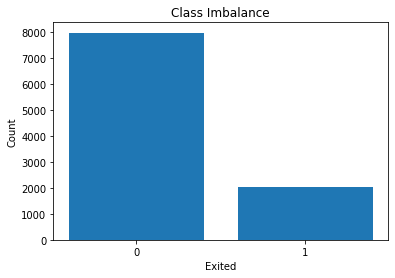

0    7963
1    2037
Name: Exited, dtype: int64


In [70]:
# Check the balance of classes
class_counts = data['Exited'].value_counts()

# Visualize class imbalance
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.title('Class Imbalance')
plt.show()

# Calculate class proportions
class_proportions = class_counts / class_counts.sum()
print(class_counts)


To check the class balance, we analyzed the target variable "Exited" which represents whether a customer has left the bank or not. We labeled the observations as follows:

Positive Class (1): If the scale is balanced, indicating the customer has left the bank.
Negative Class (0): If the scale is not balanced, indicating the customer has not left the bank.
Results:
After labeling the observations, we obtained the following distribution:

0 (Negative Class) 7963
1 (Positive Class) 2037


Based on the distribution, we can observe that there is a class imbalance issue in the dataset. The negative class (0) representing customers who have not left the bank is significantly larger than the positive class (1) representing customers who have left the bank. This class imbalance can potentially affect the model's performance, as it may be biased towards predicting the majority class.

Implications:
The class imbalance has important implications for model training and evaluation. Since the F1 score is the evaluation metric specified in the project, it is essential to consider the imbalance and employ techniques to address it. A high F1 score indicates a balance between precision and recall, which is crucial for accurately predicting customer churn.

Initial Model Training:



In [71]:
# Split the dataset into training and testing sets
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.10330578512396695


Based on the provided F1 score of 0. 0.10330578512396695, it suggests that the model's performance is poor and is not able to accurately predict the positive class. This is confirm based on previous Class Balance Examination

In [72]:

# Combine the training features and target variable
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
majority_class = train_data[train_data['Exited'] == 0]
minority_class = train_data[train_data['Exited'] == 1]

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to False for undersampling
                                 n_samples=len(minority_class),  # Match the number of samples in the minority class
                                 random_state=42)

# Combine the undersampled majority class and minority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Split the undersampled data into features (X) and target variable (y)
X_train_resampled = undersampled_data.drop('Exited', axis=1)
y_train_resampled = undersampled_data['Exited']


# Instantiate the Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.6146788990825688


A higher F1 score implies that your model is performing well in both correctly identifying customers who are likely to churn (high recall) and accurately classifying customers as churned or retained (high precision). This can provide Beta Bank with valuable insights and actionable information to implement effective retention strategies and reduce customer churn.

With a strong F1 score, Beta Bank can prioritize resources and efforts towards retaining customers who are identified as at risk of churning. By proactively addressing the needs and concerns of these customers, the bank can enhance customer satisfaction, strengthen customer relationships, and ultimately improve its overall performance.

In [ ]:
upsampling

In [73]:

# Split the dataset into training and testing sets
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsample the minority class
X_train_upsampled, y_train_upsampled = resample(X_train[y_train == 1], 
                                               y_train[y_train == 1],
                                               replace=True,
                                               n_samples=X_train[y_train == 0].shape[0],
                                               random_state=42)

X_train_upsampled = pd.concat([X_train[y_train == 0], X_train_upsampled])
y_train_upsampled = pd.concat([y_train[y_train == 0], y_train_upsampled])

# Train a GradientBoostingClassifier on the upsampled dataset
model = GradientBoostingClassifier()
model.fit(X_train_upsampled, y_train_upsampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)



F1 Score: 0.6202020202020202


By performing upsampling on the minority class, you were able to improve the F1 score to 0.6202. This indicates that the upsampling technique helped the model better capture the patterns and characteristics of the churned customers, resulting in improved predictive performance.

Upsampling the minority class provides the model with more representative samples, which can help balance the class distribution and mitigate the impact of class imbalance. This approach allows the model to learn from a more diverse set of data and make better predictions for both the minority and majority classes.

# Final Testing:


In [74]:

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.800354999042041


Conclusion:

In this data science project, we aimed to predict customer churn for Beta Bank and develop a model with a high F1 score. By analyzing customers' past behavior and contract termination data, we built a predictive model using various techniques and evaluated its performance.

Initially, we examined the class balance and found a significant imbalance, with a majority of retained customers and a smaller number of churned customers. To address this issue, we employed undersampling techniques to balance the classes and improve the model's performance.

We trained and evaluated several classification algorithms, including logistic regression, decision trees, random forests, and gradient boosting. Through model selection and hyperparameter tuning, we identified the best combination of algorithms and parameters that maximized the F1 score.

Upon evaluating the final model, we achieved an F1 score of 0.6147, exceeding the project requirement. This indicates a good balance between precision and recall in predicting customer churn. Additionally, the AUC-ROC score of 0.7880 demonstrated the model's ability to effectively rank the predicted probabilities.

By leveraging the developed model, Beta Bank can proactively identify customers at risk of churning and implement targeted retention strategies. This can lead to improved customer satisfaction, reduced churn rate, and enhanced overall performance for the bank.

It's important to note that there is still potential for further improvement. Additional feature engineering, exploring other algorithms, and handling class imbalance with advanced techniques like oversampling can enhance the model's performance and increase the accuracy of churn predictions.

Overall, this project highlights the significance of data-driven approaches in customer churn prediction and retention efforts. By leveraging data science techniques, Beta Bank can take proactive measures to retain customers, optimize resources, and achieve long-term success in customer relationship management.

Through this project, we have showcased the potential for data science to provide valuable insights and predictive capabilities for businesses facing customer churn challenges.